In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df = df.drop(["Serial No."], axis = 1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
train = df.iloc[:400, :]
test = df.iloc[400:, :-1]
val = df.iloc[400:, -1]

print(df.shape)
print(train.shape)
print(test.shape)

(500, 8)
(400, 8)
(100, 7)


In [4]:
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
X = train.drop("Chance of Admit ", 1)
y = train["Chance of Admit "]

In [7]:
from sklearn.model_selection import cross_validate, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X = pd.DataFrame(scaler.fit_transform(X), columns=train.drop(["Chance of Admit "], 1).columns)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

In [10]:
#importing extra tree classifier and then initializing it

from sklearn.ensemble import ExtraTreesRegressor
tree = ExtraTreesRegressor(random_state =1)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [11]:
# importing lightgbm Regressor
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=1)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

In [12]:
# importing xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [13]:
#importing RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
rmse_lr = np.sqrt(mean_squared_error(y_test, predict))
rmse_tree = np.sqrt(mean_squared_error(y_test, tree_pred))
rmse_lgbm = np.sqrt(mean_squared_error(y_test,lgbm_pred))
rmse_xgb = np.sqrt(mean_squared_error(y_test,xgb_pred))
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

In [16]:
print("The RMSE for linear regression model is : ", rmse_lr)
print("The RMSE for extra tree regression model is : ", rmse_tree) 
print("The RMSE for lightgbm Regressor model is : ", rmse_lgbm)
print("The RMSE for XGBoost Regressor model is : ", rmse_xgb)
print("The RMSE for Random Forest Regressor model is : ", rmse_rf)

The RMSE for linear regression model is :  0.06614861795772532
The RMSE for extra tree regression model is :  0.07016058204381768
The RMSE for lightgbm Regressor model is :  0.07183932053866045
The RMSE for XGBoost Regressor model is :  0.0745797543546979
The RMSE for Random Forest Regressor model is :  0.07038552171197332


In [17]:
# importing Ridge model

from sklearn.linear_model import Ridge
ridge = Ridge()

# hyperparameter tuning to find the best alpha value for ridge

from sklearn.model_selection import GridSearchCV
parameters = {"alpha" : [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,8,10,20] }
ridge_reg = GridSearchCV(ridge, parameters, scoring='r2', cv = 5)

ridge_reg.fit(X_train, y_train)

ridge_reg_pred = ridge_reg.predict(X_test)

#check for the best parameters
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 1e-15}
0.7781689760381411


In [18]:
# Using the new value for alpha
ridge_hype=Ridge(alpha=1e-15)
ridge_hype.fit(X_train, y_train)
ridge_hype_pred=ridge_hype.predict(X_test)

In [19]:
# importing LAsso model

from sklearn.linear_model import Lasso
lasso = Lasso()

# hyperparameter tuning to find the best alpha value for lasso
parameters = {"alpha" : [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,8,10,20] }
lasso_reg = GridSearchCV(lasso, parameters, scoring='r2', cv = 5)

lasso_reg.fit(X_train, y_train)

lasso_reg_pred = lasso_reg.predict(X_test)

#check for the best parameters
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.001}
0.7786825196720665


In [20]:
# Using the best value for lasso

lasso_hype=Lasso(alpha=0.001)
lasso_hype.fit(X_train, y_train)
lasso_hype_pred=lasso_hype.predict(X_test)

In [21]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_reg_pred))
rmse_ridge_hype_pred = np.sqrt(mean_squared_error(y_test, ridge_hype_pred))

rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_reg_pred))
rmse_lasso_hype_pred = np.sqrt(mean_squared_error(y_test, lasso_hype_pred))


print("The RMSE for ridge model is : ", rmse_ridge)
print("The RMSE for hyped ridge model is : ", rmse_ridge_hype_pred)

print("The RMSE for ridge model is : ", rmse_lasso)
print("The RMSE for hyped lasso model is : ", rmse_lasso_hype_pred)


The RMSE for ridge model is :  0.06614861795772532
The RMSE for hyped ridge model is :  0.06614861795772532
The RMSE for ridge model is :  0.06685033670344473
The RMSE for hyped lasso model is :  0.06685033670344473


In [22]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(random_state=1)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

Learning rate set to 0.030875
0:	learn: 0.1357330	total: 56.7ms	remaining: 56.6s
1:	learn: 0.1330519	total: 63.1ms	remaining: 31.5s
2:	learn: 0.1303355	total: 68.2ms	remaining: 22.7s
3:	learn: 0.1279881	total: 71.9ms	remaining: 17.9s
4:	learn: 0.1257669	total: 77.6ms	remaining: 15.4s
5:	learn: 0.1235796	total: 81.8ms	remaining: 13.5s
6:	learn: 0.1213261	total: 85.7ms	remaining: 12.2s
7:	learn: 0.1191530	total: 90.4ms	remaining: 11.2s
8:	learn: 0.1173299	total: 92.9ms	remaining: 10.2s
9:	learn: 0.1154331	total: 97.5ms	remaining: 9.65s
10:	learn: 0.1134665	total: 102ms	remaining: 9.13s
11:	learn: 0.1116327	total: 106ms	remaining: 8.76s
12:	learn: 0.1097158	total: 111ms	remaining: 8.39s
13:	learn: 0.1080185	total: 115ms	remaining: 8.1s
14:	learn: 0.1062214	total: 120ms	remaining: 7.88s
15:	learn: 0.1045047	total: 124ms	remaining: 7.63s
16:	learn: 0.1029678	total: 128ms	remaining: 7.41s
17:	learn: 0.1013070	total: 134ms	remaining: 7.33s
18:	learn: 0.0997454	total: 138ms	remaining: 7.14s
19

189:	learn: 0.0476218	total: 437ms	remaining: 1.86s
190:	learn: 0.0475298	total: 439ms	remaining: 1.86s
191:	learn: 0.0474299	total: 441ms	remaining: 1.85s
192:	learn: 0.0473117	total: 442ms	remaining: 1.85s
193:	learn: 0.0472472	total: 443ms	remaining: 1.84s
194:	learn: 0.0471530	total: 445ms	remaining: 1.83s
195:	learn: 0.0470876	total: 446ms	remaining: 1.83s
196:	learn: 0.0470548	total: 447ms	remaining: 1.82s
197:	learn: 0.0470100	total: 449ms	remaining: 1.82s
198:	learn: 0.0469345	total: 450ms	remaining: 1.81s
199:	learn: 0.0469130	total: 451ms	remaining: 1.8s
200:	learn: 0.0468496	total: 453ms	remaining: 1.8s
201:	learn: 0.0467714	total: 454ms	remaining: 1.79s
202:	learn: 0.0467067	total: 455ms	remaining: 1.79s
203:	learn: 0.0466250	total: 457ms	remaining: 1.78s
204:	learn: 0.0465709	total: 458ms	remaining: 1.78s
205:	learn: 0.0464681	total: 459ms	remaining: 1.77s
206:	learn: 0.0463924	total: 461ms	remaining: 1.76s
207:	learn: 0.0462875	total: 462ms	remaining: 1.76s
208:	learn: 0.

360:	learn: 0.0370382	total: 728ms	remaining: 1.29s
361:	learn: 0.0370080	total: 732ms	remaining: 1.29s
362:	learn: 0.0369822	total: 734ms	remaining: 1.29s
363:	learn: 0.0369469	total: 736ms	remaining: 1.28s
364:	learn: 0.0369152	total: 738ms	remaining: 1.28s
365:	learn: 0.0369077	total: 739ms	remaining: 1.28s
366:	learn: 0.0368887	total: 741ms	remaining: 1.28s
367:	learn: 0.0368064	total: 743ms	remaining: 1.28s
368:	learn: 0.0367283	total: 745ms	remaining: 1.27s
369:	learn: 0.0366838	total: 748ms	remaining: 1.27s
370:	learn: 0.0366463	total: 750ms	remaining: 1.27s
371:	learn: 0.0365765	total: 751ms	remaining: 1.27s
372:	learn: 0.0365249	total: 753ms	remaining: 1.27s
373:	learn: 0.0364348	total: 755ms	remaining: 1.26s
374:	learn: 0.0364045	total: 757ms	remaining: 1.26s
375:	learn: 0.0363506	total: 761ms	remaining: 1.26s
376:	learn: 0.0363073	total: 764ms	remaining: 1.26s
377:	learn: 0.0362638	total: 765ms	remaining: 1.26s
378:	learn: 0.0362281	total: 768ms	remaining: 1.26s
379:	learn: 

518:	learn: 0.0305907	total: 1.01s	remaining: 933ms
519:	learn: 0.0305421	total: 1.01s	remaining: 932ms
520:	learn: 0.0304844	total: 1.01s	remaining: 930ms
521:	learn: 0.0304186	total: 1.01s	remaining: 929ms
522:	learn: 0.0303620	total: 1.02s	remaining: 927ms
523:	learn: 0.0303116	total: 1.02s	remaining: 925ms
524:	learn: 0.0302604	total: 1.02s	remaining: 923ms
525:	learn: 0.0301932	total: 1.02s	remaining: 921ms
526:	learn: 0.0301909	total: 1.02s	remaining: 919ms
527:	learn: 0.0300997	total: 1.02s	remaining: 917ms
528:	learn: 0.0300724	total: 1.03s	remaining: 914ms
529:	learn: 0.0300701	total: 1.03s	remaining: 912ms
530:	learn: 0.0300436	total: 1.03s	remaining: 910ms
531:	learn: 0.0299962	total: 1.03s	remaining: 909ms
532:	learn: 0.0299395	total: 1.03s	remaining: 906ms
533:	learn: 0.0299184	total: 1.04s	remaining: 904ms
534:	learn: 0.0299163	total: 1.04s	remaining: 902ms
535:	learn: 0.0298358	total: 1.04s	remaining: 900ms
536:	learn: 0.0298015	total: 1.04s	remaining: 898ms
537:	learn: 

692:	learn: 0.0248064	total: 1.29s	remaining: 571ms
693:	learn: 0.0247908	total: 1.29s	remaining: 569ms
694:	learn: 0.0247375	total: 1.29s	remaining: 568ms
695:	learn: 0.0246835	total: 1.3s	remaining: 566ms
696:	learn: 0.0246816	total: 1.3s	remaining: 564ms
697:	learn: 0.0246386	total: 1.3s	remaining: 562ms
698:	learn: 0.0245907	total: 1.3s	remaining: 561ms
699:	learn: 0.0245499	total: 1.3s	remaining: 559ms
700:	learn: 0.0245113	total: 1.3s	remaining: 557ms
701:	learn: 0.0245075	total: 1.31s	remaining: 555ms
702:	learn: 0.0244907	total: 1.31s	remaining: 553ms
703:	learn: 0.0244888	total: 1.31s	remaining: 551ms
704:	learn: 0.0244534	total: 1.31s	remaining: 549ms
705:	learn: 0.0243994	total: 1.31s	remaining: 548ms
706:	learn: 0.0243866	total: 1.32s	remaining: 546ms
707:	learn: 0.0243599	total: 1.32s	remaining: 544ms
708:	learn: 0.0243255	total: 1.32s	remaining: 542ms
709:	learn: 0.0242967	total: 1.32s	remaining: 540ms
710:	learn: 0.0242881	total: 1.33s	remaining: 539ms
711:	learn: 0.0242

904:	learn: 0.0194823	total: 1.7s	remaining: 178ms
905:	learn: 0.0194482	total: 1.7s	remaining: 177ms
906:	learn: 0.0194196	total: 1.7s	remaining: 175ms
907:	learn: 0.0193789	total: 1.7s	remaining: 173ms
908:	learn: 0.0193719	total: 1.71s	remaining: 171ms
909:	learn: 0.0193708	total: 1.71s	remaining: 169ms
910:	learn: 0.0193646	total: 1.71s	remaining: 167ms
911:	learn: 0.0193393	total: 1.71s	remaining: 165ms
912:	learn: 0.0193021	total: 1.71s	remaining: 163ms
913:	learn: 0.0192877	total: 1.71s	remaining: 161ms
914:	learn: 0.0192648	total: 1.71s	remaining: 159ms
915:	learn: 0.0192598	total: 1.72s	remaining: 157ms
916:	learn: 0.0192437	total: 1.72s	remaining: 156ms
917:	learn: 0.0192311	total: 1.72s	remaining: 154ms
918:	learn: 0.0192295	total: 1.72s	remaining: 152ms
919:	learn: 0.0192202	total: 1.72s	remaining: 150ms
920:	learn: 0.0192026	total: 1.72s	remaining: 148ms
921:	learn: 0.0191636	total: 1.73s	remaining: 146ms
922:	learn: 0.0191501	total: 1.73s	remaining: 144ms
923:	learn: 0.01

In [23]:
rmse_cat = np.sqrt(mean_squared_error(y_test,cat_pred))

In [24]:
print("The RMSE for catboost regressor model is : ", rmse_cat)

The RMSE for catboost regressor model is :  0.06969507664704536


In [25]:
RMSES = [rmse_lr,rmse_tree, rmse_lgbm, rmse_xgb,rmse_rf,rmse_ridge, 
         rmse_ridge_hype_pred, rmse_lasso,rmse_lasso_hype_pred, rmse_cat]
RMSES.sort()

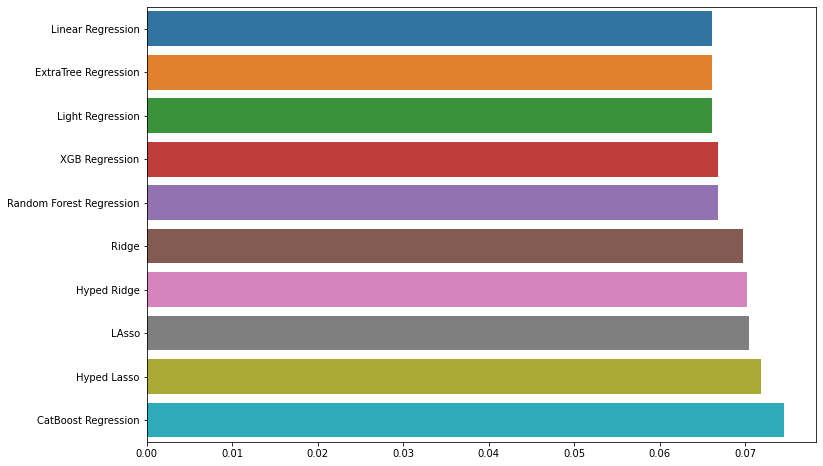

In [26]:
#ploting a barchart to show the rmse scores of each model  
y_axis=['Linear Regression' ,'ExtraTree Regression', 'Light Regression',
       'XGB Regression', 'Random Forest Regression', 
        'Ridge', 'Hyped Ridge', 'LAsso', 'Hyped Lasso', 'CatBoost Regression']

plt.figure(figsize = (12,8))
sns.barplot(x= RMSES, y=y_axis, linewidth=1.5)

### from this plot, we can see that Linear Regression has the lowest rmse score, therefore, we will be using the Linear model for predicting our last 100 observations.

In [27]:
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
400,304,100,2,3.5,3.0,8.22,0
401,315,105,2,3.0,3.0,8.34,0
402,324,109,3,3.5,3.0,8.94,1
403,330,116,4,4.0,3.5,9.23,1
404,311,101,3,2.0,2.5,7.64,1


In [28]:
val.head()

400    0.63
401    0.66
402    0.78
403    0.91
404    0.62
Name: Chance of Admit , dtype: float64

In [29]:
test_pred = lr.predict(test)

In [30]:
test_pred

array([0.61506475, 0.66510703, 0.78631253, 0.86562301, 0.5775521 ,
       0.52353767, 0.65571179, 0.60771874, 0.57570831, 0.56396779,
       0.53005606, 0.58201824, 0.61264972, 0.61753094, 0.73524353,
       0.79015612, 0.63294099, 0.5753336 , 0.64911174, 0.62354889,
       0.51659831, 0.81247541, 0.79822413, 0.94687961, 0.90485223,
       0.93873834, 0.7245362 , 0.73180422, 0.72993157, 0.88431595,
       0.65958377, 0.77034443, 0.84882674, 0.74962774, 0.63208328,
       0.59114603, 0.56503864, 0.6088275 , 0.72648593, 0.67209476,
       0.55522606, 0.76601813, 0.90750024, 0.85470851, 0.87555015,
       0.87273823, 0.93988078, 0.80917874, 0.76450285, 0.77404275,
       0.80555336, 0.86275808, 0.90529162, 0.75259725, 0.62428264,
       0.54651724, 0.54941853, 0.48936722, 0.6772982 , 0.87010991,
       0.76079539, 0.61015038, 0.61366398, 0.59888049, 0.47599563,
       0.64368247, 0.74134493, 0.77403463, 0.81633926, 0.84372004,
       0.8461064 , 0.64230681, 0.90382315, 0.64458873, 0.62529

In [31]:
test_rmse = np.sqrt(mean_squared_error(val,test_pred))

In [32]:
print("The rmse score on the last 100 observation is :",test_rmse)

The rmse score on the last 100 observation is : 0.04159957347787646
